<a href="https://colab.research.google.com/github/nikitaghadge495/CodSoft/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [3]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape


(10000, 14)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

<Axes: xlabel='Exited', ylabel='count'>

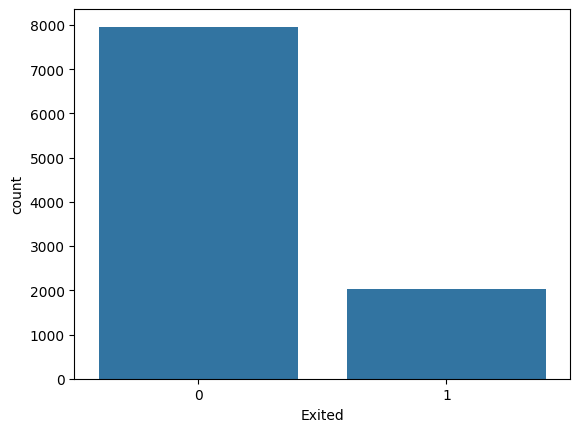

In [10]:
sns.countplot(x='Exited',data=df)

<Axes: xlabel='Geography', ylabel='count'>

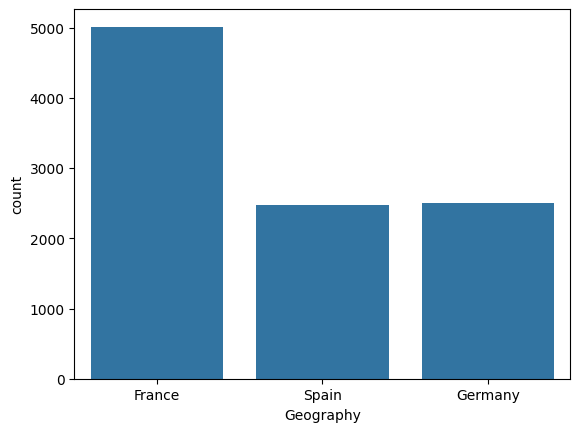

In [11]:
sns.countplot(x='Geography',data=df)

<Axes: xlabel='CreditScore', ylabel='count'>

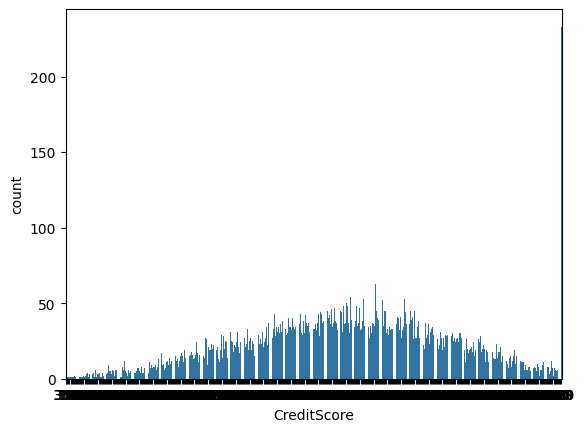

In [12]:
sns.countplot(x='CreditScore',data=df)

<Axes: xlabel='Gender', ylabel='count'>

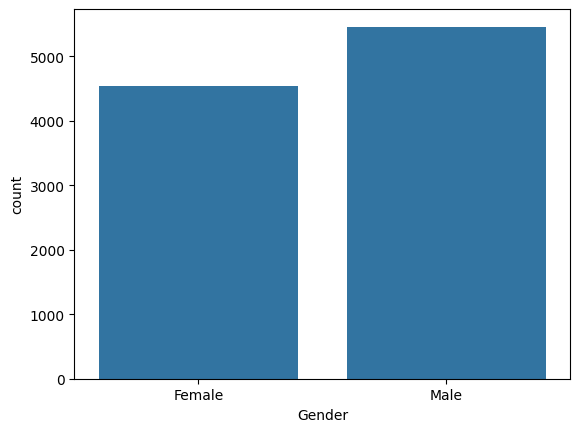

In [14]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Age', ylabel='count'>

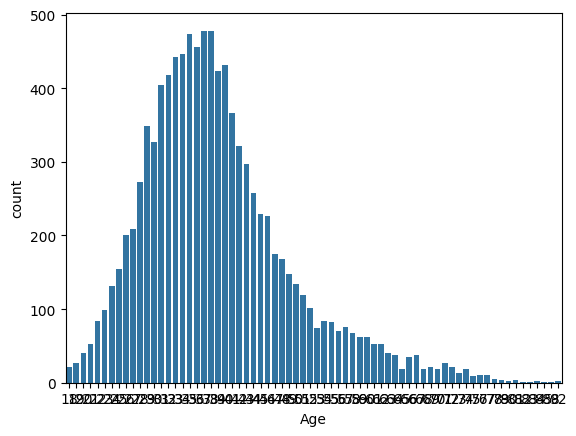

In [15]:
sns.countplot(x='Age',data=df)

<Axes: xlabel='IsActiveMember', ylabel='count'>

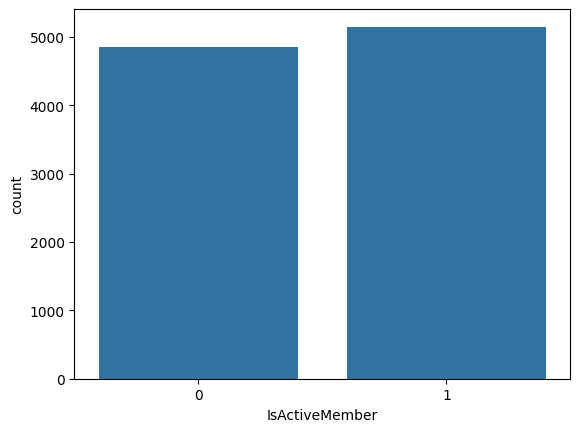

In [16]:
sns.countplot(x='IsActiveMember',data=df)

<Axes: xlabel='Exited', ylabel='count'>

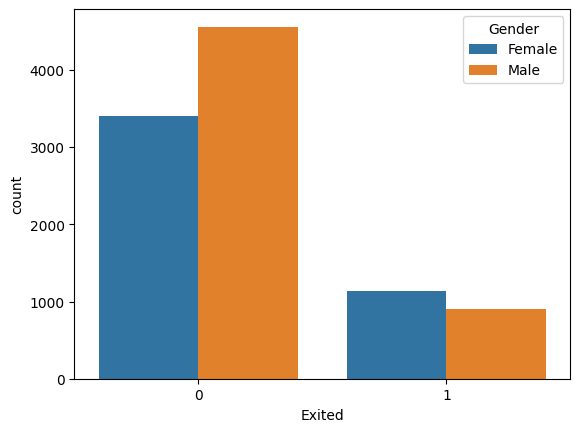

In [17]:
sns.countplot(x='Exited', hue='Gender', data=df)

<Axes: xlabel='Geography', ylabel='count'>

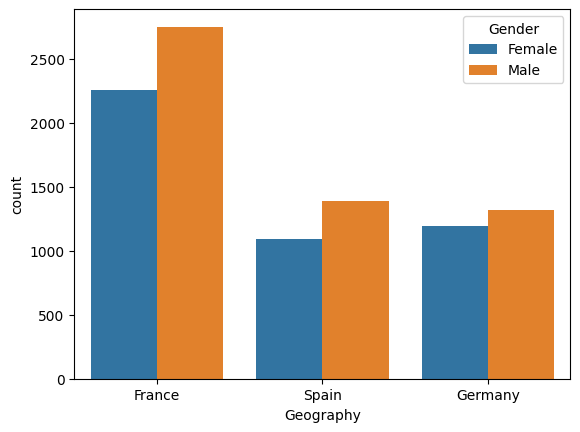

In [18]:
sns.countplot(x='Geography', hue='Gender', data=df)

<Axes: xlabel='Exited', ylabel='count'>

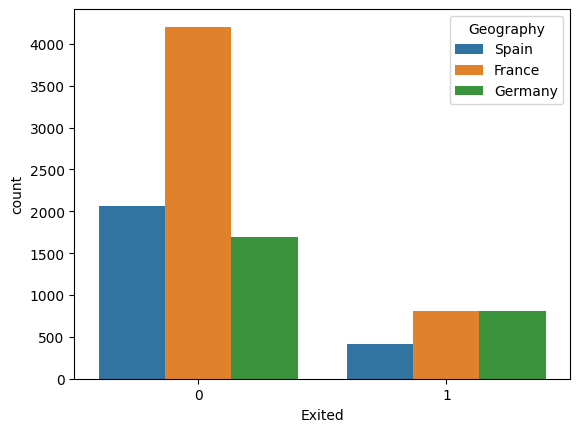

In [19]:
sns.countplot(x='Exited', hue='Geography', data=df)

<Axes: xlabel='NumOfProducts', ylabel='count'>

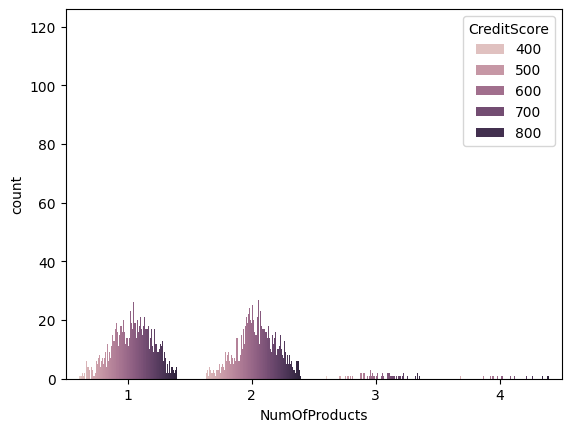

In [22]:
sns.countplot(x='NumOfProducts', hue='CreditScore', data=df)

In [24]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [25]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [26]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [27]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [28]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [29]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [30]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
label_encoder = LabelEncoder()
df['Geography']=label_encoder.fit_transform(df["Geography"])
df['Gender']=label_encoder.fit_transform(df["Gender"])

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

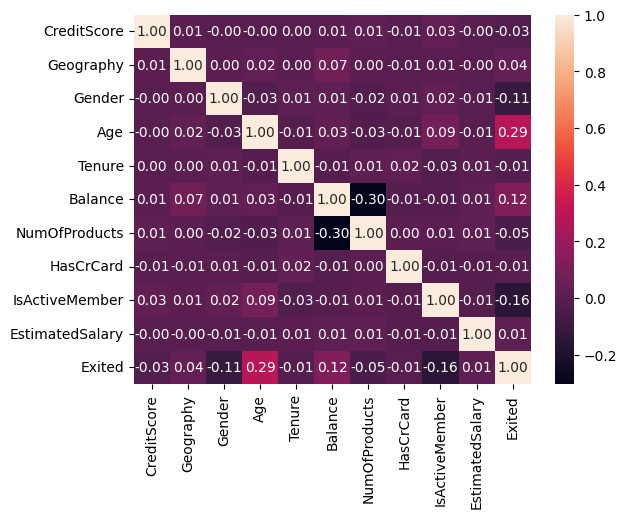

In [35]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [36]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [37]:
x_train, x_test,y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=42 )

In [38]:
x_train.shape

(8000, 10)

In [39]:
x_test.shape

(2000, 10)

In [40]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()

In [41]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'GradientBoostingClassifier']
accuracies=[]

In [42]:
def cal(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)

    accuracies.append(accuracy)

    print("-----Model Evaluation on Test Data-----")
    print(model)
    print()
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    print()
    print('Classification Report:\n',classification_report(y_test,y_pred))

-----Model Evaluation on Test Data-----
LogisticRegression()

Confusion Matrix:
 [[1573   34]
 [ 365   28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



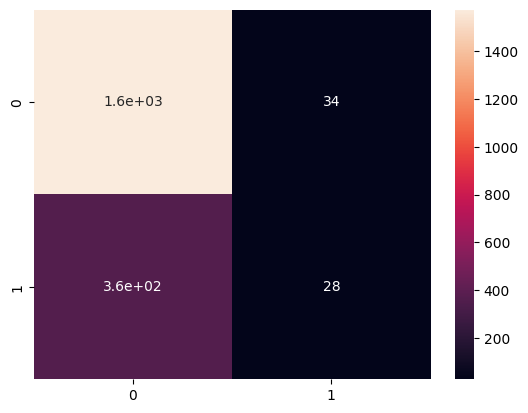

In [43]:
cal(model1)

-----Model Evaluation on Test Data-----
RandomForestClassifier()

Confusion Matrix:
 [[1556   51]
 [ 212  181]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



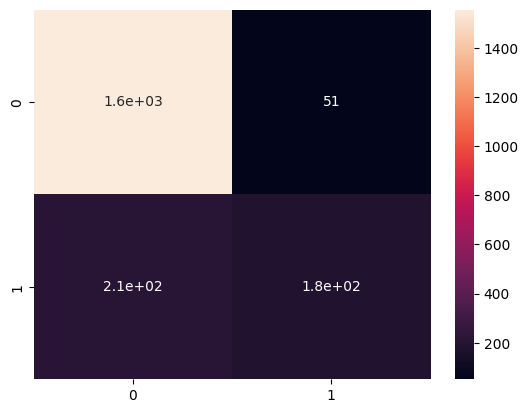

In [44]:
cal(model2)

-----Model Evaluation on Test Data-----
GradientBoostingClassifier()

Confusion Matrix:
 [[1547   60]
 [ 209  184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



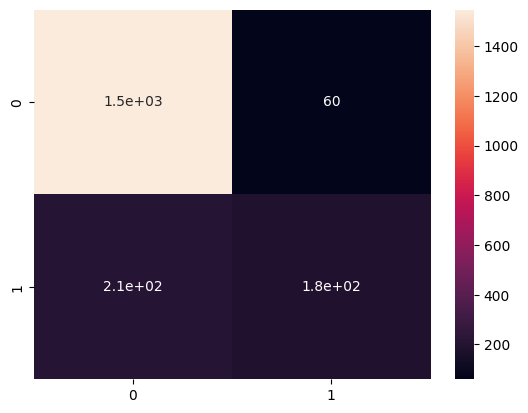

In [45]:
cal(model3)

In [46]:
accuracies

[0.8005, 0.8685, 0.8655]

In [47]:
FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})

In [48]:
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.8005
1,RandomForestClassifier,0.8685
2,GradientBoostingClassifier,0.8655


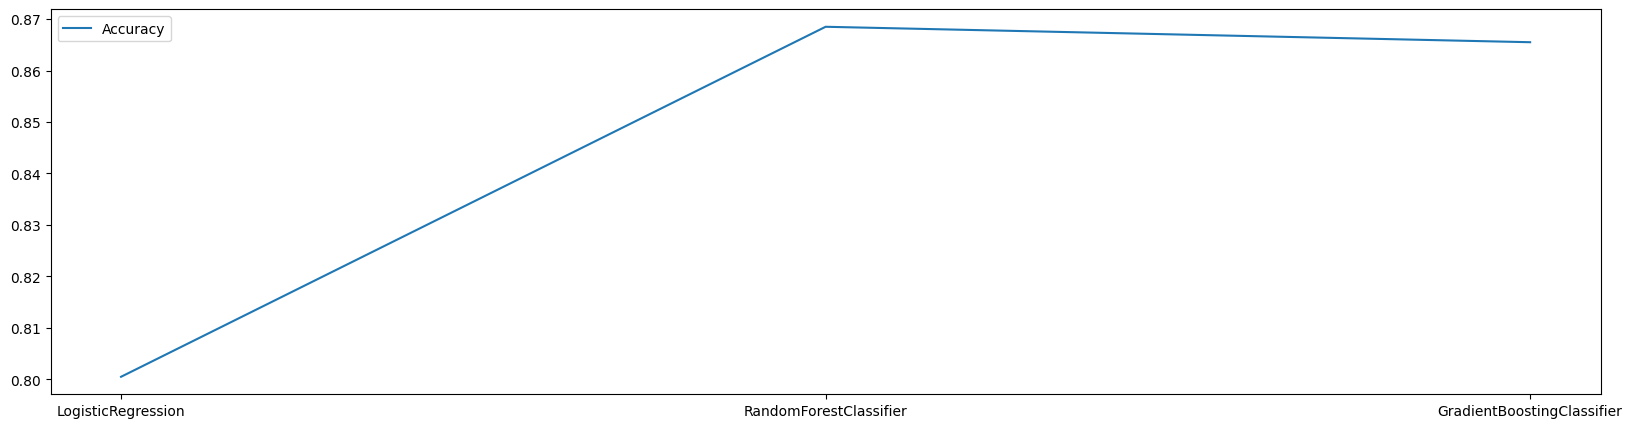

In [49]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,accuracies,label="Accuracy")
plt.legend()
plt.show()

In [50]:
# Gradient Boosting Model
y_pred = model3.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8655
